# Apple And Pear Detection using Neural Networks in PyTorch

In [1]:
import os
import torch
import torchvision
import tarfile
from torch.utils.data import random_split

In [2]:
train_dataset_url="fruits-360/Training"
test_dataset_url="fruits-360/Test"

In [3]:
train_folder=os.listdir(train_dataset_url)
test_folder=os.listdir(test_dataset_url)

In [4]:
print("Train Class: ", len(train_folder))
print("Test Class: ", len(test_folder))

Train Class:  22
Test Class:  22


In [5]:
print(train_folder)

['Apple Golden 3', 'Pear Monster', 'Pear Kaiser', 'Apple Red 2', 'Apple Red 3', 'Pear 2', 'Apple Granny Smith', 'Apple Crimson Snow', 'Pear Forelle', 'Apple Braeburn', 'Pear Stone', 'Apple Red Delicious', 'Apple Red 1', 'Apple Pink Lady', 'Pear Red', 'Apple Red Yellow 1', 'Pear Williams', 'Apple Golden 2', 'Pear Abate', 'Pear', 'Apple Golden 1', 'Apple Red Yellow 2']


In [6]:
print(test_folder)

['Apple Golden 3', 'Pear Monster', 'Pear Kaiser', 'Apple Red 2', 'Apple Red 3', 'Pear 2', 'Apple Granny Smith', 'Apple Crimson Snow', 'Pear Forelle', 'Apple Braeburn', 'Pear Stone', 'Apple Red Delicious', 'Apple Red 1', 'Apple Pink Lady', 'Pear Red', 'Apple Red Yellow 1', 'Pear Williams', 'Apple Golden 2', 'Pear Abate', 'Pear', 'Apple Golden 1', 'Apple Red Yellow 2']


In [7]:
plum_files = os.listdir(train_dataset_url + "/Apple Golden 3")
print('No. of training examples for plum files:', len(plum_files))
print(plum_files[:5])

No. of training examples for plum files: 481
['r_260_100.jpg', 'r_116_100.jpg', '178_100.jpg', '28_100.jpg', 'r_161_100.jpg']


In [8]:
banana_files = os.listdir(train_dataset_url + "/Pear Williams")
print('No. of training examples for banana files:', len(banana_files))
print(banana_files[:5])

No. of training examples for banana files: 490
['178_100.jpg', '28_100.jpg', 'r_161_100.jpg', 'r_60_100.jpg', 'r_78_100.jpg']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
dataset = ImageFolder(train_dataset_url, transform=ToTensor())

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 4


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [12]:
print(dataset.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams']


In [13]:
import matplotlib.pyplot as plt

In [14]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Golden 3 (4)


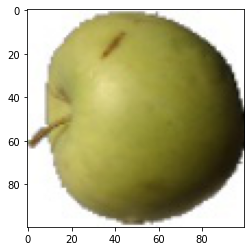

In [15]:
show_example(*dataset[0])

Label:  Pear Kaiser (17)


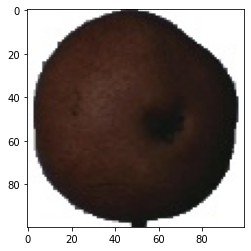

In [16]:
show_example(*dataset[1000])

Label:  Apple Crimson Snow (1)


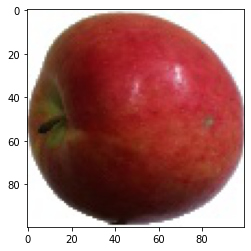

In [17]:
show_example(*dataset[3506])

In [22]:
random_seed = 31
torch.manual_seed(random_seed);

In [23]:
val_size = 1000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(10441, 1000)

In [24]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [25]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [26]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

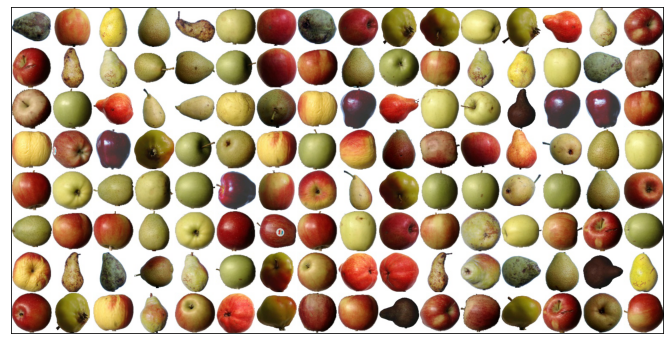

In [27]:
show_batch(train_dl)

In [28]:
torch.cuda.is_available()

True

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 950M
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
# Next, let's define a function that can move data and model to a chosen device.

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move data to the selected device, as a batches are accessed. 
# All we need is an __iter__ method to retrieve batches of data, and an __len__ method to get the number of batches.

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [32]:
import torch.nn as nn
import torch.nn.functional as F

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        # . A commonly used loss function for classification problems is the cross entropy.
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [34]:
input_size=3*100*100 # parameters
output_size=22

In [35]:
class FruitFnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(input_size, 2048) # hidden layer
        self.linear2=nn.Linear(2048, 512) # hidden layer
        self.linear3=nn.Linear(512, 128)  # hidden layer
        self.linear4=nn.Linear(128, 64) #hidden layer
        self.linear5=nn.Linear(64, output_size) # output layer
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        # Get predictions using output layer
        return out

In [36]:
@torch.no_grad()

# Here we are using torch.max() function, this function's default behaviour as you can guess by the name is to return maximum among the elements in the Tensor. 
# However, this function also helps get the maximum along a particular dimension, as a Tensor, instead of a single element.
# To specify the dimension (axis – in numpy), there is another optional keyword argument, called dim. This represents the direction that we take for the maximum.
# dim=0, (maximum along columns).
# dim=1 (maximum along rows).

def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch) # extract loss
            train_losses.append(loss)
            loss.backward() # generate gradients
            optimizer.step() # All optimizers implement a step() method, that updates the parameters.
            optimizer.zero_grad() # Clears the gradients of all optimized torch.Tensor,because every time a variable is back propogated through,
            
            # the gradient will be accumulated instead of being replaced.
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item() # combine losses
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [37]:
Fnn_model = FruitFnnModel()
Fnn_model

FruitFnnModel(
  (linear1): Linear(in_features=30000, out_features=2048, bias=True)
  (linear2): Linear(in_features=2048, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=22, bias=True)
)

In [38]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = Fnn_model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 100, 100])
out.shape: torch.Size([128, 22])
out[0]: tensor([-0.0155, -0.0406,  0.0249, -0.0604,  0.0628, -0.0591, -0.0604, -0.0886,
         0.0276, -0.0928,  0.1401,  0.0968, -0.0065,  0.0054, -0.0878,  0.1057,
        -0.1231, -0.0205, -0.0707,  0.0592,  0.1347,  0.0760],
       grad_fn=<SelectBackward0>)


In [39]:
Fnn_train_dl = DeviceDataLoader(train_dl, device)
Fnn_val_dl = DeviceDataLoader(val_dl, device)
to_device(Fnn_model, device);

In [40]:
Fnn_model = to_device(FruitFnnModel(), device)

In [41]:
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 3.0927963256835938, 'val_acc': 0.04670662805438042}

In [44]:
num_epochs = 15 
opt_func = torch.optim.Adam

lr = 0.001

In [45]:
Fnn_history = fit(num_epochs, lr, Fnn_model, Fnn_train_dl, Fnn_val_dl, opt_func)

Epoch [0], train_loss: 2.1366, val_loss: 1.0452, val_acc: 0.6578
Epoch [1], train_loss: 0.6434, val_loss: 0.4849, val_acc: 0.8444
Epoch [2], train_loss: 0.2825, val_loss: 0.1795, val_acc: 0.9448
Epoch [3], train_loss: 0.2444, val_loss: 0.1240, val_acc: 0.9581
Epoch [4], train_loss: 0.0966, val_loss: 0.0433, val_acc: 0.9950
Epoch [5], train_loss: 0.0445, val_loss: 0.0278, val_acc: 0.9921
Epoch [6], train_loss: 0.0426, val_loss: 0.0266, val_acc: 0.9921
Epoch [7], train_loss: 0.0145, val_loss: 0.0085, val_acc: 1.0000
Epoch [8], train_loss: 0.0199, val_loss: 0.0052, val_acc: 1.0000
Epoch [9], train_loss: 0.0056, val_loss: 0.0017, val_acc: 1.0000
Epoch [10], train_loss: 0.0017, val_loss: 0.0015, val_acc: 1.0000
Epoch [11], train_loss: 0.0013, val_loss: 0.0017, val_acc: 1.0000
Epoch [12], train_loss: 0.4170, val_loss: 0.1169, val_acc: 0.9673
Epoch [13], train_loss: 0.0433, val_loss: 0.0065, val_acc: 1.0000
Epoch [14], train_loss: 0.0198, val_loss: 0.0029, val_acc: 1.0000


In [46]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('accuracy plot');


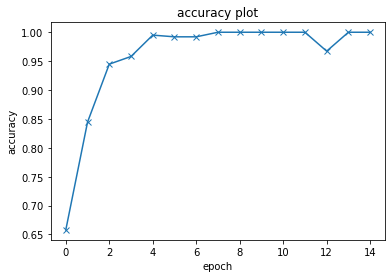

In [47]:
plot_accuracies(Fnn_history)

In [48]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss plot ');

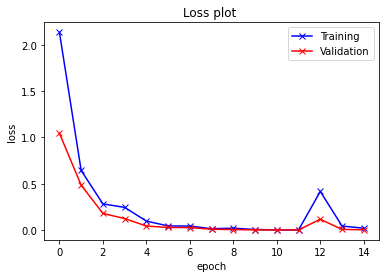

In [49]:
plot_losses(Fnn_history)

In [50]:
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 0.0029255151748657227, 'val_acc': 1.0}

In [51]:
test_dataset = ImageFolder(test_dataset_url, transform=ToTensor())
len(test_dataset)

3823

In [52]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: Apple Golden 3 , Predicted: Apple Golden 3


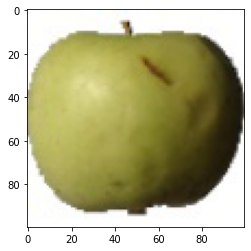

In [54]:
img, label = test_dataset[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Golden 1 , Predicted: Apple Golden 1


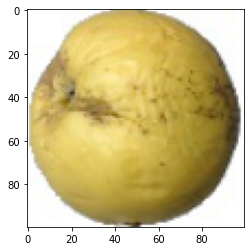

In [55]:
img, label = test_dataset[3500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Granny Smith , Predicted: Apple Granny Smith


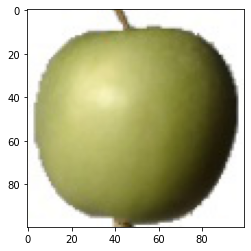

In [58]:
img, label = test_dataset[1011]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Red 2 , Predicted: Apple Red 2


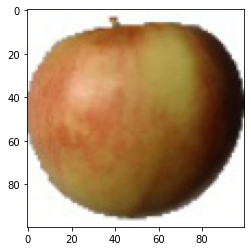

In [59]:
img, label = test_dataset[500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))

Label: Apple Red 3 , Predicted: Apple Red 1


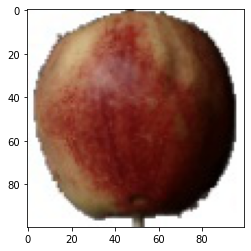

In [60]:
img, label = test_dataset[700]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


Label: Pear Forelle , Predicted: Pear Forelle


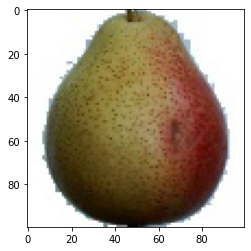

In [61]:
img, label = test_dataset[1500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


Label: Apple Red Delicious , Predicted: Apple Red Delicious


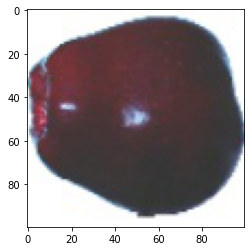

In [62]:
img, label = test_dataset[2000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


Label: Pear 2 , Predicted: Pear 2


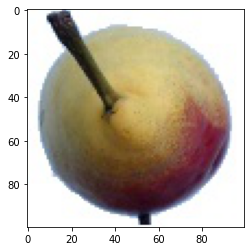

In [63]:
img, label = test_dataset[800]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


Label: Pear 2 , Predicted: Pear 2


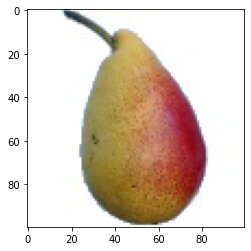

In [64]:
img, label = test_dataset[850]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, Fnn_model))


In [67]:
evaluate(Fnn_model, Fnn_val_dl)

{'val_loss': 0.0029255151748657227, 'val_acc': 1.0}

In [68]:
torch.save(Fnn_model.state_dict(), 'apple-pear.pth')